<center><h1>CS356 Lab 2 <br /><br />Introduction to Cryptographic Tools</h1></center>

### Overview

This *crytopgraphic tools* lab presents a number of exercises designed to give you a better understanding of the following topics:

1. Base64 Encoding
2. Random Number Generation
3. Symmetric Encryption
    - streaming ciphers
    - block ciphers
    - AES 
4. Student Assignment

Part 2 of this tutorial is in a separate jupyter notebook and covers the following topics:

1. Diffie-Helman Key Exchange
2. Asymmetric Public-Key Encryption
3. Digital Digests (hashing)
4. Digital Signatures

Most of this notebook requires you to simply read about a topic area, then execute code cells containing pre-written code to illustrate the topic.  You will not have to write any code for the bulk of this notebook.  However, the last part of the notebook requires you to write your own code to accomplish a task.  A code skeleton is given in this assignment.  Note:  You won't be able to succeed unless you have actually read and understood all the topics in this notebook; you will most likely be copying and pasting code snippets from various sections into your final assignment.

When you finish this assignment, you must turn in your results to Canvas as described at the end of this notebook.

#### Acknowledgements and Citations

This jupyter notebook is based on a blend of original material as well as material from multiple sources including wikipedia, tutorialspoint, and others as cited in-line.



----

### Part 1:  Base64 Encoding

This section is based on a wikipedia article on Base64.

Encrypting a message from plaintext to ciphertext  is very likely to generate ciphertext that contains **unprintable** characters. Unprintable binary data do not pose a problem if all we do is store this data into a binary file.  On the other hand, it is **not ok** if we want to send the ciphertext containing unprintable characters in an email or if we want to view the data printed as output from a program.  How do we make our data **readable**.

This is where the base64 **encoding** mechanism comes in.  Base64 is a binary-to-text encoding scheme that translates binary data into a radix-64 representation.  This maps all the data into very printable ASCII characters and the problem is solved.  

Let's take a look at how the encoding works.  The basic idea is to divide the data into chunks of three 8-bit bytes (24 bits).    Each 24-bit chunk is then sub-divided into four 6-bit chunks (still 24 bits).  These 6-bit chunks give us a number from 0 to 63 which we use to map into a table of ASCII characters as shown below.

**The Base64 index table:**

|Index|Binary|Char||Index|Binary|Char||Index|Binary|Char||Index|Binary|Char|
|:---:|---|---|| :---: |---|---||:---:|---|---||:---:|---|---|
|0|	000000|	A||	16|	010000|	Q||	32|	100000|	g||	48|	110000|	w|
|1|	000001|	B||	17|	010001|	R||	33|	100001|	h||	49|	110001|	x|
|2|	000011|	D||	19| 010011|	T||	35|	100011|	j||	51|	110011|	z|
|4|	000100|	E||	20|	010100|	U||	36|	100100|	k||	52|	110100|	0|
|5|	000101|	F||	21|	010101|	V||	37|	100101|	l||	53|	110101|	1|
|6|	000110|	G||	22|	010110|	W||	38|	100110|	m||	54|	110110|	2|
|7|	000111|	H||	23|	010111|	X||	39|	100111|	n||	55|	110111|	3|
|8|	001000|	I||	24|	011000|	Y||	40|	101000|	o||	56|	111000|	4|
|9|	001001|	J||	25|	011001|	Z||	41|	101001|	p||	57|	111001|	5|
|10|001010|	K||	26|	011010|	a||	42|	101010|	q||	58|	111010|	6|
|11|001011|	L||	27|	011011|	b||	43|	101011|	r||	59|	111011|	7|
|12|001100|	M||	28|	011100|	c||	44|	101100|	s||	60|	111100|	8|
|13|001101|	N||	29|	011101|	d||	45|	101101|	t||	61|	111101|	9|
|14|001110|	O||	30|	011110|	e||	46|	101110|	u||	62|	111110|	+|
|15|001111|	P||	31|	011111|	f||	47|	101111|	v||	63|	111111|	/|
|padding|	=|

Here is an example encoding.  We'll encode the following ASCII text (this could just as easily be binary byte array data, but I wouldn't be able to print it):

>Many are cold, but few are frozen!

The base 64 encoding of this becomes: 

>TWFueSBhcmUgY29sZCwgYnV0IGZldyBhcmUgZnJvemVuIQ==

The algorithm requires us to break the binary array into 3 byte chunks (24 bits).  Then to take the chunk of 24 bits and divide it into 4 6-bit chunks.  This is shown below for the first 3 characters, "Man" to show the conversion to "TWFu":

<img src="http://cs.colostate.edu/~gersch/cs356/jupyter/images/base64Wikipedia1.png" width="600px" />

Then you step and repeat for each set of 3 octets until you hit the end of the data to be encoded.

At that point you end up in one of three situations:

* No bytes remain (the data divided evenly into 3-byte chunks)
* You have one byte left over
* You have two bytes left over

When there are one or two leftover bytes, you have to extend the data into a 3-byte chunk by first filling out with zeroes to complete a 6-bit unit, and then padding with the "=" character for the missing data.  These encoding techniques shown in the following two diagrams.

<img src="http://cs.colostate.edu/~gersch/cs356/jupyter/images/base64Wikipedia4.png" width="600px" />

<img src="http://cs.colostate.edu/~gersch/cs356/jupyter/images/base64Wikipedia5.png" width="600px" />

This completes the encoding process.  Decoding is done by reversing the process.

Note that we are using the phrases **"encode to base64"** and **"decode from base64"**.  Encoding and Decoding are absolutely NOT encryption, in the sense that there is no secret key involved.  The encoding and decoding are simple mathematical manipulations and anyone can do the decoding of a base64 message back to its original form.

Now let's take a look at how to do this in Python.  Execute the following cell to see how the `base64` library makes this a simple process. 

In [1]:
#
#   BASE64 illustration
#

from base64 import b64encode, b64decode

message = "Many are cold, but few are frozen!"
print ("Original message which could have unprintable characters, but this one doesn't:\n ", message)
print ("message length:", len(message))
print ()

# the base64 library won't work with strings, you need to first convert to a byte array, the encode to base64
encodedBytes = b64encode(message.encode("utf-8"))
print("Base64 encoded string:\n", encodedBytes)
print ("message length:", len(encodedBytes))
print ()

# Note that the output is also a byte array, not a string.  If you want, you can convert it to a string
print ("convert byte array to a string:\n", str(encodedBytes, 'utf-8'))
print() 

# Now decode the base64 back to the original 
decodedBytes =b64decode(encodedBytes)
decodedString = str(decodedBytes, "utf-8")
print("Decode message back to its original form: \n", decodedString)
print ("message length:", len(decodedString))

Original message which could have unprintable characters, but this one doesn't:
  Many are cold, but few are frozen!
message length: 34

Base64 encoded string:
 b'TWFueSBhcmUgY29sZCwgYnV0IGZldyBhcmUgZnJvemVuIQ=='
message length: 48

convert byte array to a string:
 TWFueSBhcmUgY29sZCwgYnV0IGZldyBhcmUgZnJvemVuIQ==

Decode message back to its original form: 
 Many are cold, but few are frozen!
message length: 34


Let's look a little deeper at the actual operations involved in converting data to base64. We will look at the first 3 characters of the message above "`I a`" to see how it encodes to the four bytes "`SSBh`".  

Execute the following cell and examine the results.

In [2]:
#
#   Code to demonstrate the inner workings of Base64 conversion
#

# Define our conversion table
B64Table = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+/"

# convert the 3 character message to integer representation
message = "Man"

ascii = [message[i] for i in range(len(message))]
print ("These are the 3 ascii characters:\n", ascii)
print ()

data = [ord(message[i]) for i in range(len(message))]
print ("These are the ascii integers of the message:\n", data)
print ()

# Now split the 3 8 bit characters (24 bits) into 4 6-bit characters (24 bits)
# There is probably a much more elegant way to do this...

bits24 = data[0] * 256 * 256 + data[1] * 256 + data[2]
b64int = []
for i in range(4):
    b64int.append(bits24 % 64) 
    bits24 = bits24 >> 6
b64int.reverse()
print ("Here are the 4 6-bit characters:\n", b64int)

# Now look up the characters in the conversion table
b64chr = []
for i in range(4):
    b64chr.append(B64Table[b64int[i]])
print (b64chr)

These are the 3 ascii characters:
 ['M', 'a', 'n']

These are the ascii integers of the message:
 [77, 97, 110]

Here are the 4 6-bit characters:
 [19, 22, 5, 46]
['T', 'W', 'F', 'u']


See... it's pretty simple.  To decode we simply do the process in reverse.  And don't forget to account for padding if there are not an even multiple of 3 bytes.

Let's move on to a new topic.

----

### Part 2:  Random Numbers

Random numbers are used for many  purposes in security applications.  The problem is, most random number generators aren't as **unpredictable** as we would like them to be.  Imagine creating a random number to be used as the secret key in elliptic curve cryptography.  If an attacker can make a reasonable guess as to what the random number is, all of the encryption efforts are worthless.  

Random numbers, as generated by a pseudo-random number generator (**PRNG**), must be unpredictable.  A *True* Random number generator (**TRNG**) would be nice to have, but these are not generally available.  So use the cryptographically-strongest library you can find.

Python has a `random` library that can generate various types of random numbers.  This library is not considered to be strong enough for cryptographic purposes.  Nevertheless, we will give several examples to show how the library and random numbers work in general.

The pyCrypt library has a more robust random number generator, and the `system.urandom` function is also considered quite strong.

Let's get a feel for random numbers and random distributions.  Execute the cells below and examine the outputs.

In [1]:
import random

print("Here is a single sample from a uniform random variable")
print(random.random())
print ()

print("Here is a list of three samples:")
uniSamples = [random.random(), random.random(), random.random()]
print(uniSamples)
print ()

print("Here is a list of three exponential samples:")
expSamples = [random.expovariate(1.0), random.expovariate(1.0), random.expovariate(1.0)]
print(expSamples)


Here is a single sample from a uniform random variable
0.5105982012465357

Here is a list of three samples:
[0.5274588229505914, 0.15410539068359064, 0.054562884425048086]

Here is a list of three exponential samples:
[0.037426927628679205, 1.6425756408295984, 1.7017495290230809]


#### Random distributions

The python `random` library allows you to generate random numbers using various distributions.  To see this, execute the cells below.  In general, crypto uses a uniform random number generator. 

*Python code adapted from https://www.grotto-networking.com/DiscreteEventPython.html*

[0.3163182423110681, 0.8612645598527379, 0.24479340552086792, 0.41155906963206146, 0.5960038031176159, 0.47386334483180126, 0.6829654202487925, 0.13603155596512084, 0.8942002516207422, 0.6077279501832659]


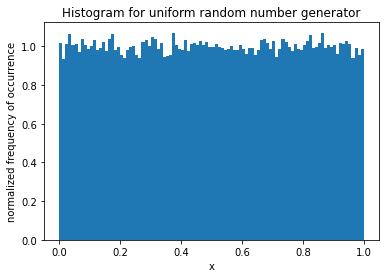

In [4]:
#
#   Generate a uniform distribution.  
#

import random
import matplotlib.pyplot as plt

uniSamples = [random.random() for i in range(100000)]
print(uniSamples[0:10])  #Take a look at the first 10
fig, axis = plt.subplots()

##### depending on your version of matplotlib, use one of the two lines below

axis.hist(uniSamples, bins=100, density=True, stacked=True) 
#axis.hist(uniSamples, bins=100, normed=True)

axis.set_title("Histogram for uniform random number generator")
axis.set_xlabel("x")
axis.set_ylabel("normalized frequency of occurrence")
#fig.savefig("UniformHistogram.png")
plt.show()

[7.104469000030853, 8.62482939888693, 8.821156432807154, 7.952596102083822, 9.856770050545121, 7.057771034150631, 6.0077770398104935, 11.258001629975514, 9.064236658225889, 8.071716602207367]


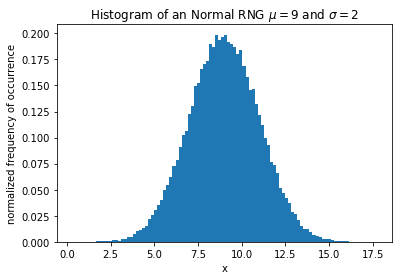

In [5]:
#
#  Generate a normal Gaussian distribution 
#  (aka: "standard distribution" or "bell-shaped curve")
#

import random
import matplotlib.pyplot as plt

normSamples = [random.normalvariate(9.0, 2.0) for i in range(100000)]
print(normSamples[0:10])  #Take a look at the first 10
fig, axis = plt.subplots()

##### depending on your version of matplotlib, use one of the two lines below

axis.hist(normSamples, bins=100, density=True, stacked=True) 
#axis.hist(uniSamples, bins=100, normed=True)

axis.set_title(r"Histogram of an Normal RNG $\mu = 9$ and $\sigma = 2$")
axis.set_xlabel("x")
axis.set_ylabel("normalized frequency of occurrence")
plt.show()

[37.07265557463455, 24.247739306897113, 12.292274368289997, 7.32856996605774, 32.865190951725396, 46.96205456458646, 11.682307267493426, 23.784101011949925, 18.298663532902466, 0.977243118749549]


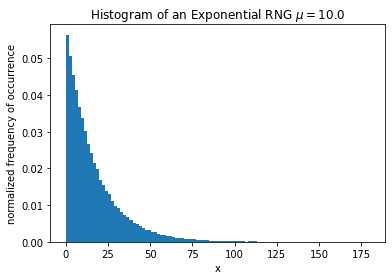

In [6]:
#
#    generate an exponential distribution.  Useful in simulations of networks to generate random inter-arrival times.
#


import random
import matplotlib.pyplot as plt

expoSamples = [random.expovariate(0.06) for i in range(100000)]
print(expoSamples[0:10])  #Take a look at the first 10
fig, axis = plt.subplots()

##### depending on your version of matplotlib, use one of the two lines below

axis.hist(expoSamples, bins=100, density=True, stacked=True) 
#axis.hist(uniSamples, bins=100, normed=True)

axis.set_title(r"Histogram of an Exponential RNG $\mu = 10.0$")
axis.set_xlabel("x")
axis.set_ylabel("normalized frequency of occurrence")
plt.show()

The `random` library also has a call to your operating system's random number generator as well as a library for a random byte generator, as shown in the cell below:

In [1]:
#
#   Show use of another PRNG
#

import random
import secrets

number = random.SystemRandom().random()
print("secure number is ", number)

print("Secure byte token", secrets.token_bytes(16))

secure number is  0.9713560141132331
Secure byte token b'\xb0\xcf\xd4D\xfbG%5\xa2\x18\x94\xe3^7\x1f\x03'


#### How random is random?

As mentioned, random numbers should be unpredictable.  But PRNGs use algorithms that could be weak.  There are many statistical tests to determine just how strong the PRNG is.  

For our purposes, we will just eyeball the results of the python PRNG.  No real conclusion can be made from these small samples.  But the graphs are fun to look at.  Finally, we show how random numbers can be used to estimate PI, using a monte-carlo technique.

3.16


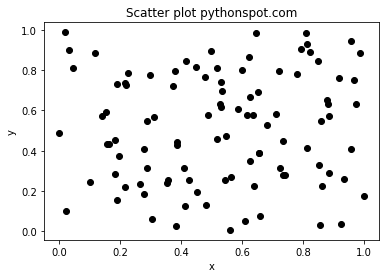

In [8]:
#
#   A "not very good" test of randomness, but it gives you an intuitive feel for the data.
#   There are much better statistical tests for randomness than this.  But this makes a pretty chart!
#

from random import *
from math import sqrt
import matplotlib.pyplot as plt

inside=0
n=100
for i in range(0,n):
	x=random()
	y=random()
	plt.plot(x,y,'o',color="black")
	if sqrt(x*x+y*y)<=1:
		inside+=1
pi=4*inside/n
print (pi)

plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Pi estimated to be  3.1488


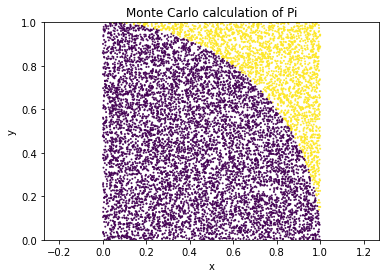

In [9]:
#
#   Estimate PI using a monte-carlo technique.  
#   Generate random numbers in a grid, see how many fall into the circle and get the ratio
#

from random import *
from math import sqrt
import matplotlib.pyplot as plt

inside=0
n=10000

x = [random() for i in range(n)]
y = [random() for i in range(n)]
colors = []
for i in range(0,n):
	if sqrt(x[i]*x[i]+y[i]*y[i])<=1:
		inside+=1
		colors.append(1)
	else:
		colors.append(4)
        
pi=4*inside/n
print ("Pi estimated to be ", pi)

plt.figure()
plt.scatter(x, y, s=1, c=colors, alpha=0.85)
plt.axis('equal')
plt.axis([0.0, 1.0, 0.0, 1.0])
plt.title('Monte Carlo calculation of Pi')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Subsequent sections of these jupyter notebooks will show the use of random numbers in generating session keys and the use of the pyCrypt library for random numbers.

Let's move on the final topic of this lab: symmetric encryption.

----

### Part 3:  Symmetric Encryption

Symmetric encryption uses a single key.  This key is used to encrypt plaintext to ciphertext as well as decrypt ciphertext back into plain text.  Both parties must have the same key and keep it secret from prying eyes.  This is the reason the key is referred to as a "secret key" or as a "shared secret".

There are two main methods for symmetric encryption:  stream ciphers and block ciphers.  Let's look at both.

####  3A:  Stream Ciphers

A stream cipher is a method of encrypting text in which a cryptographic key and algorithm are applied to each binary digit in a data stream, one bit at a time. This method is not much used in modern cryptography. The main alternative method is the block cipher in which a key and algorithm are applied to blocks of data rather than individual bits in a stream.  Stream cipher is usually used in limited resource
environment, such as cell phones, network stream media,
wireless network and mobile devices and so on.

If you do a google search for stream encryption, you will see that there are many algorithms.  One method uses the key to perform a random byte shift.  A more popular way is to simply XOR the key with the data.  XOR is a convenient function because it does produce very good results, and best of all, XOR is its own inverse.  Decryption is simple: XOR the ciphertext with the key and out pops the plaintext.

The code below is an example of stream encryption using XOR.  Execute the cell to see how it works.


In [10]:
#
#  Simple demo program to perform stream encryption and decryption
#  

from base64 import b64encode, b64decode
from itertools import cycle

def xor_crypt_string(data, key = 'awesomepassword', encode = False, decode = False):
   
   if decode:
      data = str(b64decode(data), "utf-8")  # decode from base64 to ciphertext  
   
   # This single line of code performs both streaming encryption and decryption
   # because the XOR function is its own inverse. 

   # Python3 zip iterator: zip('ABCD', 'xy') --> Ax By
   # Python3 cycle iterator: cycle('ABCD') --> A B C D A B C D A B C D ... 

   xored = ''.join(chr(ord(x) ^ ord(y)) for (x,y) in zip(data, cycle(key)))  # encrypt/decrypt 
   if encode:
      return xored, b64encode(xored.encode("utf-8").strip())  # return encrypted ciphertext and base64 version
   return xored  # return decrypted plaintext


secret_data = "Did you know that XOR is its own inverse.  Of course you did!"
print ("Original Plaintext: ", secret_data)
print ()

cipherText, encodedCipherText = xor_crypt_string(secret_data, encode = True)
print ("CipherText with unprintable characters: ", cipherText)
print ("CipherText in base64: ", encodedCipherText)
print ("See.... That's why we need base64!\n")

plainText = xor_crypt_string(encodedCipherText, decode = True)
print ("Decrypted PlainText: ", plainText)

Original Plaintext:  Did you know that XOR is its own inverse.  Of course you did!

CipherText with unprintable characters:  %SP
 O E+ ?ESRE ]WO=A
 PW @
CipherText in base64:  b'JR4BUxYCEFAKHRwATwYMAANFKyA/RRkSUxoDHFILFhlFGgEbAAISFl1XTz0CQRQKBh0eAFAYHAZXCxsAQA=='
See.... That's why we need base64!

Decrypted PlainText:  Did you know that XOR is its own inverse.  Of course you did!


#### 3B:  Block Ciphers

Block ciphers take plaintext and break it up into blocks of N bytes.  The algorithm may perform one or multiple *rounds* of cryptographic operations on each block.   The operations could include XORing data, shifting and rotating data within the block, summing data, etc.  

Plaintext data must completely fill each block. If necessary, a block will be padded with extra data to complete a partially filled block.

Block ciphers generally operate in one of two modes:  

* **Electronic Codebook Mode (ECB)**: each block is handled independently from each other
* **Cipher Block Chaining (CBC)**:  data from one block can be used as data when processing a subsequent block.

Most modes require a unique binary sequence, often called an initialization vector (IV), for each encryption operation. The IV has to be non-repeating and, for some modes, random as well. The initialization vector is used to ensure distinct ciphertexts are produced even when the same plaintext is encrypted multiple times independently with the same key.

These modes are illustrated in the diagram below (source: wikipedia):

<img src="http://cs.colostate.edu/~gersch/cs356/jupyter/images/ECBEncryption.png" alt="EBC mode" width="600px" />

<img src="http://cs.colostate.edu/~gersch/cs356/jupyter/images/CBCEncryption.png" alt = "CBC mode" width="600px" />


The Python program below demonstrates a very simple block encryption algorithm. The steps for encryption are:

1. Pad the data to ensure last block is full.
2. Break into 8 byte blocks. For each block
    * XOR the block with the key
    * SWAP bytes within the block based on each byte of the key.  Set up first/last pointers into the block.  If the key byte is even, do not swap and simply increment the first pointer.  If the key byte is odd, swap the data bytes, increment the first pointer, and decrement the last pointer.  The SWAP operation is done when the pointers are equal or pass each other.  
    
Decryption is similar but reverse the order: first do the SWAP operation (which is its own inverse), then the XOR, then remove the padding.

Execute the cell below to see how it works.

In [11]:
#
#  A very simple block encryption algorithm
#

import binascii

def pad(str):
    #  this block cipher uses 8 byte blocks.  If necessary, pad with hex 0x80 to fill out the block.
    padLength = 0 if (len(str) % 8) == 0 else 8 - (len(str) % 8) 
    return str + "".join(chr(128) for i in range (padLength))

def removePad(str):
    index = str.find(chr(128))
    return str if index == -1 else str[:index]

def printBlocks(comment, blocks):
    print (comment)
    print ('/nDisregard extra utf-8 byte when high-order bit is set.\n')
    for block in blocks: print (binascii.hexlify(block.encode('utf-8')))
    print ()

def makeBlocks(data):
    # break the data into 8-byte blocks
    blocks = [''.join(x) for x in zip(*[list(data[z::8]) for z in range(8)])]
    return blocks
    
def xorBlock(block, key):
    # XOR the block with the key
    return ''.join(chr(ord(x) ^ ord(y)) for (x,y) in zip(block, key))

def swapBlock(block,key):
    # SWAP data bytes if byte in key is odd
    begin = 0
    end = 7
    blocklist = list(block)  # strings are immutable, so turn into a list
    for c in key:
        if (ord(c) % 2):
            blocklist[begin], blocklist[end] = blocklist[end], blocklist[begin]
            end -= 1
        begin += 1
        if (begin >= end): break
    return "".join(blocklist)
    
    
def blockEncrypt(data, key):
    # pad the data out to a multiple of 8 bytes.
    data = pad(data)
    
    # break the padded data into 8-byte blocks
    blocks = makeBlocks(data)
    print ("plaintext broken into blocks; note padding!\n", blocks)
    print ()
    printBlocks("block data in hex", blocks)

    ciphertext = ""
    print ("Encrypted blocks:\n")
    for block in blocks:

        # XOR the key with the block
        block = xorBlock(block, key)

        # SWAP if byte in key is odd
        block = swapBlock(block, key)
        print (binascii.hexlify(block.encode('utf-8')))
        ciphertext += block
    print ()
    return ciphertext

def blockDecrypt(data, key):
    # break the ciphertext into 8-byte blocks
    blocks = makeBlocks(data)
    
    plaintext = ""
    for block in blocks:
        # reverse the order of XOR and SWAP performed by the encryption
        # SWAP if byte in key is odd
        block = swapBlock(block, key)
        # XOR the key with the block
        block = xorBlock(block, key)
        print (block)
        plaintext += block
        
    # remove the padding
    return removePad(plaintext)

###### MAIN

key = "MySecret"  # must be 8 bytes, the size of a block. Shared secret key is used for both encryption and decryption.
clearText = "Block ciphers are generally more robust and harder to crack than stream ciphers.  So there."
print ("This is the original text:\n", clearText)
print ()

# encrypt
cipherText = blockEncrypt(clearText, key)

print ("Ciphertext (possibly has unprintable characters):")
print (cipherText)
print ()

# decrypt
plainText = blockDecrypt(cipherText, key)
print ("\nplaintext:", plainText)



This is the original text:
 Block ciphers are generally more robust and harder to crack than stream ciphers.  So there.

plaintext broken into blocks; note padding!
 ['Block ci', 'phers ar', 'e genera', 'lly more', ' robust ', 'and hard', 'er to cr', 'ack than', ' stream ', 'ciphers.', '  So the', 're.\x80\x80\x80\x80\x80']

block data in hex
/nDisregard extra utf-8 byte when high-order bit is set.

b'426c6f636b206369'
b'7068657273206172'
b'652067656e657261'
b'6c6c79206d6f7265'
b'20726f6275737420'
b'616e642068617264'
b'657220746f206372'
b'61636b207468616e'
b'2073747265616d20'
b'636970686572732e'
b'2020536f20746865'
b'72652ec280c280c280c280c280'

Encrypted blocks:

b'1d065208063c150f'
b'060452101736113d'
b'1517170d00345928'
b'11171d0e452a1521'
b'54110116073c0b6d'
b'1017130b4537172c'
b'0606520c11730b28'
b'1a041a1745381a2c'
b'5408130617270a6d'
b'5a1600060d23102e'
b'110d06430a00596d'
b'c3b4c3a5c3b2c3a3c3a57d1c3f'

Ciphertext (possibly has unprintable characters):
 4Y(E*!T<mE7

####  3C:  AES, The Advanced Encryption Standard

AES is the symmetric encryption algorithm used for a wide variety of  purposes today. It is a block cipher that can be run in either EBC or CBC mode.  AES can be run with several fixed-size keys:  AES-128, AES-196, and AES-256.

We will discuss this algorithm in class.  The only task to accomplish at this point is to learn how to use AES from Python.  Edit and then execute the first cell below to create a plaintext file.  Then execute the second cell to encrypt your data with AES-256. 

** Notice: This cell may not work until you install the pycrypto library using the terminal command `pip3 install pycrypto`.**

In [12]:
# create a plaintext file for this exercise

with open("lab2Plain.txt", "w") as fd:
    fd.write("This is a really cool file!\n")
    fd.write("It has my name in it:  MY NAME GOES HERE\n")


In [1]:
#
#  code to encrypt with AES-256
#

import base64
import hashlib
from Crypto import Random
from Crypto.Hash import SHA256
from Crypto.Cipher import AES

# define a class structure to define encrypt/decrypt methods

class AESCipher(object):

    # initialize the class instance and creating a key from user's password
    def __init__(self, passPhrase): 
        self.bs = AES.block_size
        print ("block size", self.bs)
        # get a 256 bit key by hashing your password
        self.key = hashlib.sha256(passPhrase.encode()).digest()
        print ("256 bit key derived from password:\n", self.key)
        print ()

    # method to perform AES encryption
    def encrypt(self, plainText):
        # the plaintext length must be a multiple of blocksize
        # Pad the data if necessary
        padded = self._pad(plainText) 
        # Each time we encrypt we will need a random initialization vector
        iv = Random.new().read(AES.block_size)
        # Instantiate a cipher object from the AES library
        # Give it the key, set it to cipher-block-chaining mode, and
        # give it the initialization vector
        cipherObject = AES.new(self.key, AES.MODE_CBC, iv)
        # Encrypt the data/padding after converting to byte array
        encrypted = cipherObject.encrypt(padded.encode('utf-8'))
        # concatenate the iv and the ciphertext and convert to base64                                 
        encoded = base64.b64encode(iv + encrypted)
        return encoded

    # method to perform AES decryption
    def decrypt(self, cipherText):
        # decode the base64 string which contains the IV and ciphertext
        encrypted = base64.b64decode(cipherText) 
        # strip off the initialization vector
        iv = encrypted[:AES.block_size]
        # instantiate an AES cipher object with same parameters as before
        cipherObject = AES.new(self.key, AES.MODE_CBC, iv)
        # decrypt the string, strip off the padding and return the plaintext
        return self._unpad(cipherObject.decrypt(encrypted[AES.block_size:]))

    # method to pad a string to an even multiple of block size
    # the pad character is a hex digit indicating the length of the padding
    def _pad(self, s):
        return s + (self.bs - len(s) % self.bs) * chr(self.bs - len(s) % self.bs)

    # method to strip the padding
    @staticmethod
    def _unpad(s):
        return s[:-ord(s[len(s)-1:])]
    
#
#  The main routine
#

# read the plaintext file as one block of data 
# side note:  large files should be read in a loop

with open("lab2Plain.txt", "r") as fd:
    plaintext = fd.read()

passPhrase = "Hello Kitty!"
myCipher = AESCipher(passPhrase)
cipherText = myCipher.encrypt(plaintext)
print ("The base64 encoding of the IV and cipherText:\n", cipherText)
print ()
    
#### write the ciphertext file
with open("lab2Cipher.txt", "wb") as fd:
    fd.write(cipherText)


block size 16
256 bit key derived from password:
 b'\xe2\xe3\x05\r\x05~\x051\x93\xcd\xa1\xc4\xffF\x12F\xf3:$\xca\xb1n\xb6\x984z\xd94\xf5\xb0\xd3\xda'

The base64 encoding of the IV and cipherText:
 b'o3NWJnqWKcbjZB9zHr2R3BKcC/AkR+ccSt5AejVx23MFRsf4W3anfvs9Lu9lGlLI9SIc1KN+gMgSeViu/LDg1XZ34QsuXHeQ1FziEyb6cjf8xPFZ5cwRcoPch5XR7QQY'



----

### Your Assignment

You are to write a short program that decrypts the file you just wrote above and print out the plaintext. Use the code base in the cell below and edit the main routine to perform the following tasks:

* opens and reads the base64 encoded ciphertext file
* decrypts this back into plaintext and prints it out


In [3]:
#
#  Your assignment
#   By: Elita Danilyuk

import base64
import hashlib
from Crypto import Random
from Crypto.Hash import SHA256
from Crypto.Cipher import AES

# define a class structure to define encrypt/decrypt methods

class AESCipher(object):

    # initialize the class instance and creating a key from user's password
    def __init__(self, passPhrase): 
        self.bs = AES.block_size
        print ("block size", self.bs)
        # get a 256 bit key by hashing your password
        self.key = hashlib.sha256(passPhrase.encode()).digest()
        print ("256 bit key derived from password:\n", self.key)
        print ()

    # method to perform AES encryption
    def encrypt(self, plainText):
        # the plaintext length must be a multiple of blocksize
        # Pad the data if necessary
        padded = self._pad(plainText) 
        # Each time we encrypt we will need a random initialization vector
        iv = Random.new().read(AES.block_size)
        # Instantiate a cipher object from the AES library
        # Give it the key, set it to cipher-block-chaining mode, and
        # give it the initialization vector
        cipherObject = AES.new(self.key, AES.MODE_CBC, iv)
        # Encrypt the data/padding after converting to byte array
        encrypted = cipherObject.encrypt(padded.encode('utf-8'))
        # concatenate the iv and the ciphertext and convert to base64                                 
        encoded = base64.b64encode(iv + encrypted)
        return encoded

    # method to perform AES decryption
    def decrypt(self, cipherText):
        # decode the base64 string which contains the IV and ciphertext
        encrypted = base64.b64decode(cipherText) 
        # strip off the initialization vector
        iv = encrypted[:AES.block_size]
        # instantiate an AES cipher object with same parameters as before
        cipherObject = AES.new(self.key, AES.MODE_CBC, iv)
        # decrypt the string, strip off the padding and return the plaintext
        return self._unpad(cipherObject.decrypt(encrypted[AES.block_size:]))

    # method to pad a string to an even multiple of block size
    # the pad character is a hex digit indicating the length of the padding
    def _pad(self, s):
        return s + (self.bs - len(s) % self.bs) * chr(self.bs - len(s) % self.bs)

    # method to strip the padding
    @staticmethod
    def _unpad(s):
        return s[:-ord(s[len(s)-1:])]
    
#
#  The main routine
#

# read the ciphertext file as one block of data 

#### insert your code here

# opens and reads the base64 encoded ciphertext file
# decrypts this back into plaintext and prints it out

with open("lab2Plain.txt", "r") as fd:
    plaintext = fd.read()

passPhrase = "Hello Kitty!"
myCipher = AESCipher(passPhrase)
cipherText = myCipher.encrypt(plaintext)

# decrypt the file
plainText = myCipher.decrypt(cipherText)
print ("The plaintext:\n", plainText)

block size 16
256 bit key derived from password:
 b'\xe2\xe3\x05\r\x05~\x051\x93\xcd\xa1\xc4\xffF\x12F\xf3:$\xca\xb1n\xb6\x984z\xd94\xf5\xb0\xd3\xda'

The plaintext:
 b'This is a really cool file!\nIt has my name in it:  Elita Danilyuk\n'


#### What to turn in

create a tar archive of 2 files:

* the lab2Cipher.txt file created earlier that has your encrypted name
* copy and paste the cell you just created to decrypt the file into a file named `AESdecrypt.py`.

#### Grading

This is an all or none exercise.  You will get 100% if the TAs can take your ciphertext file and decrypt it with your decryption program.